In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

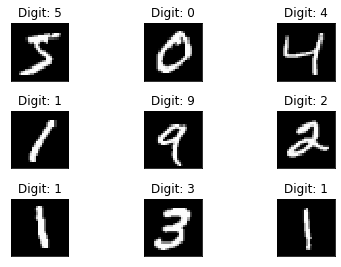

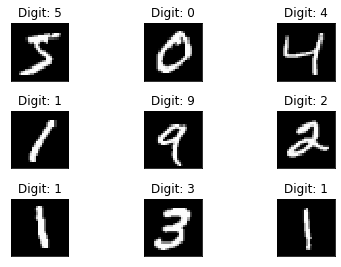

In [12]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [13]:
# scalling
X_train = X_train / 255
X_test = X_test / 255

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='elu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3013 - accuracy: 0.9129
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1445 - accuracy: 0.9574
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0977 - accuracy: 0.9709
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0739 - accuracy: 0.9774
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0571 - accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0461 - accuracy: 0.9859
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0372 - accuracy: 0.9886
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0307 - accuracy: 0.9904
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0253 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0892 - accuracy: 0.9739


[0.0891958624124527, 0.9739000201225281]

Text(69.0, 0.5, 'Truth')

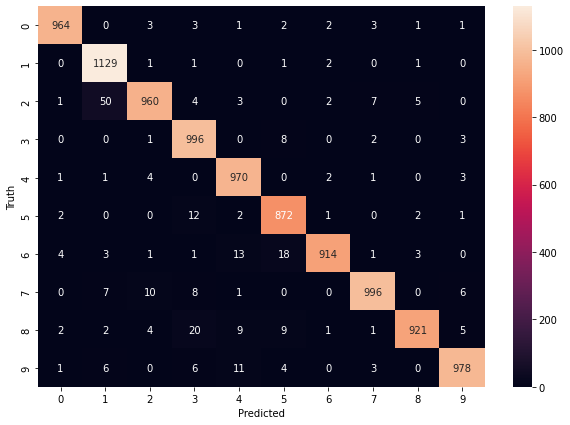

In [16]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
y_predictedd = model.predict(X_test)
y_predictedd[9]

array([2.0498490e-05, 9.4770620e-08, 1.3141365e-06, 9.4882917e-01,
       9.9995923e-01, 7.4502826e-04, 2.0373231e-07, 9.9992895e-01,
       5.8859748e-01, 1.0000000e+00], dtype=float32)

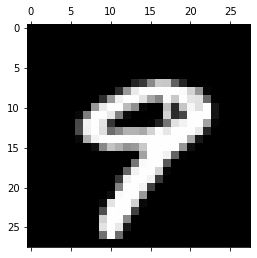

In [29]:
plt.matshow(X_test[9], cmap='gray')

In [31]:
np.argmax(y_predicted[9])


9